In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
columns=["sym","nor_los","make","fuel_type","asp","no_door","body_style","d_wheels","engine_loc","wheel_base","length","width","height","curb_weight","engine_type","no_cyl","engine_size","fuel_system","bore","stroke","com_ratio","hpower","peak_rpm","city_mpg","hw_mpg","price"]
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names=columns,na_values="?")
data.head()

,sym,nor_los,make,fuel_type,asp,no_door,body_style,d_wheels,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,com_ratio,hpower,peak_rpm,city_mpg,hw_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [425]:
data.describe()

,sym,nor_los,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,com_ratio,hpower,peak_rpm,city_mpg,hw_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sym          205 non-null    int64  
 1   nor_los      164 non-null    float64
 2   make         205 non-null    object 
 3   fuel_type    205 non-null    object 
 4   asp          205 non-null    object 
 5   no_door      203 non-null    object 
 6   body_style   205 non-null    object 
 7   d_wheels     205 non-null    object 
 8   engine_loc   205 non-null    object 
 9   wheel_base   205 non-null    float64
 10  length       205 non-null    float64
 11  width        205 non-null    float64
 12  height       205 non-null    float64
 13  curb_weight  205 non-null    int64  
 14  engine_type  205 non-null    object 
 15  no_cyl       205 non-null    object 
 16  engine_size  205 non-null    int64  
 17  fuel_system  205 non-null    object 
 18  bore         201 non-null    float64
 19  stroke  

In [427]:
data.shape

(205, 26)

<H6>
Column1:Symboling
<H6>    
    


In [428]:
data.sym.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: sym, dtype: int64

In [429]:
data.sym.isnull().sum()

0

In [430]:
data.sym.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

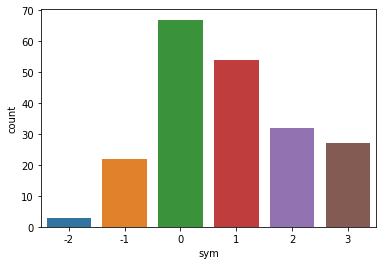

In [431]:
sns.countplot(data.sym)

<H6>
-2,-1,0,1,2,3 is rearranged as less than zero,zero,1,2,3
<H6>

In [432]:
data.sym.replace([-2,-1,0,1,2,3],['less than zero','less than zero','zero','1','2','3'],inplace=True)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

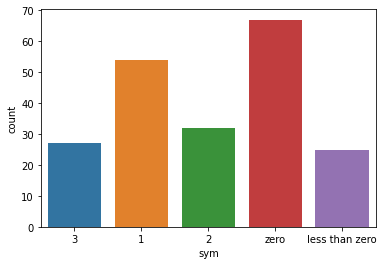

In [433]:
sns.countplot(data.sym)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

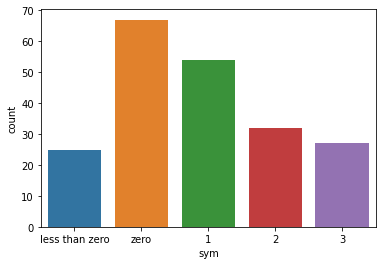

In [434]:
sns.countplot(data.sym,order=['less than zero','zero','1','2','3'])

<H6>
Column2:Normalised Losses
<H6>    

In [435]:
data.nor_los.isnull().sum()

41

In [436]:
data.nor_los.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: nor_los, dtype: float64

In [437]:
data.nor_los.fillna(122.0,inplace=True)

In [438]:
data.nor_los.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x11860cb80>,
 'caps': [<matplotlib.lines.Line2D at 0x11861a2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11860c7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x11861aa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x11861ad90>],
 'means': []}

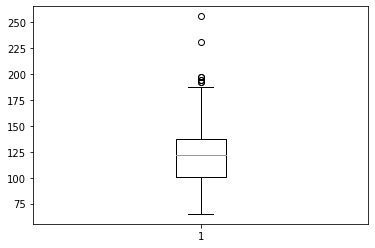

In [439]:
plt.boxplot(data.nor_los)

In [440]:
data.nor_los.unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

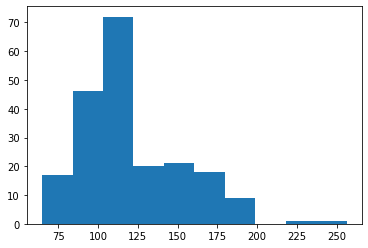

In [441]:
plt.hist(data.nor_los)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nor_los', ylabel='count'>

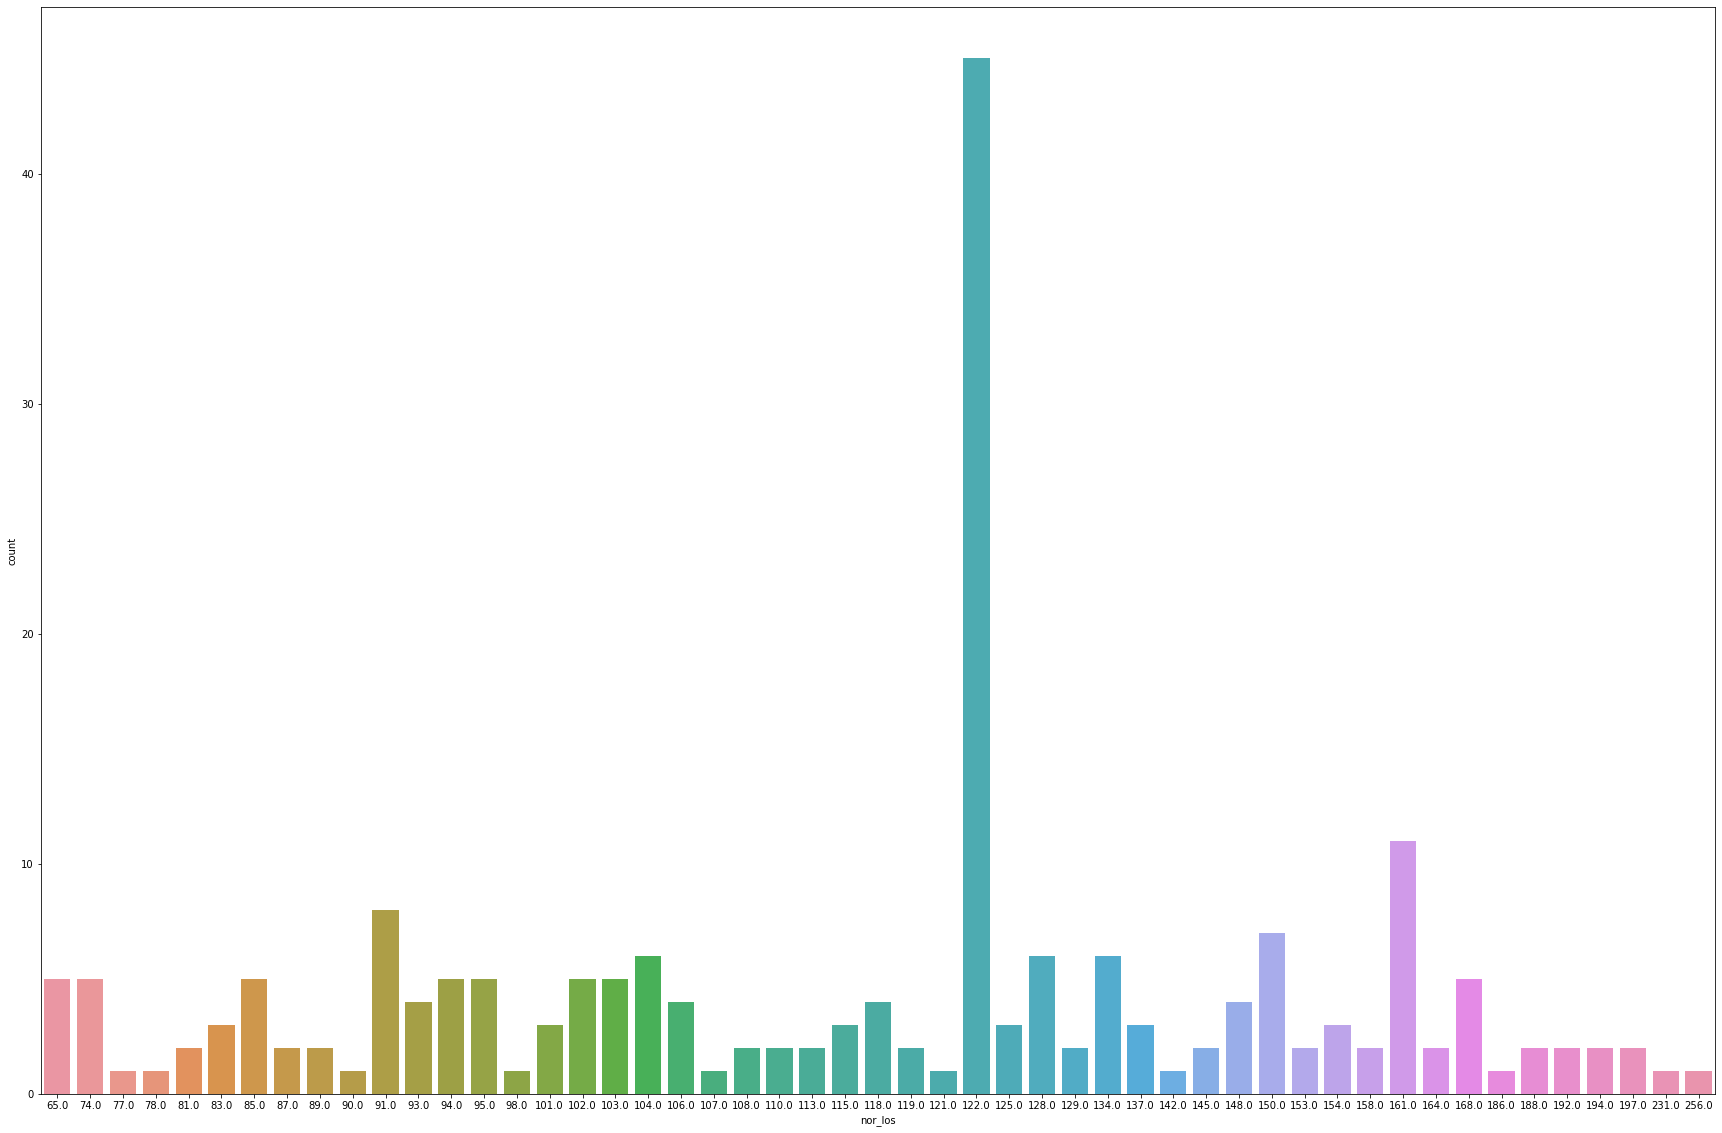

In [442]:
plt.figure(figsize=(30,20))
sns.countplot(data.nor_los)

<H6>
Column3:Make
<H6>    

In [443]:
data.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [444]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [445]:
data.make.isnull().sum()

0

In [446]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

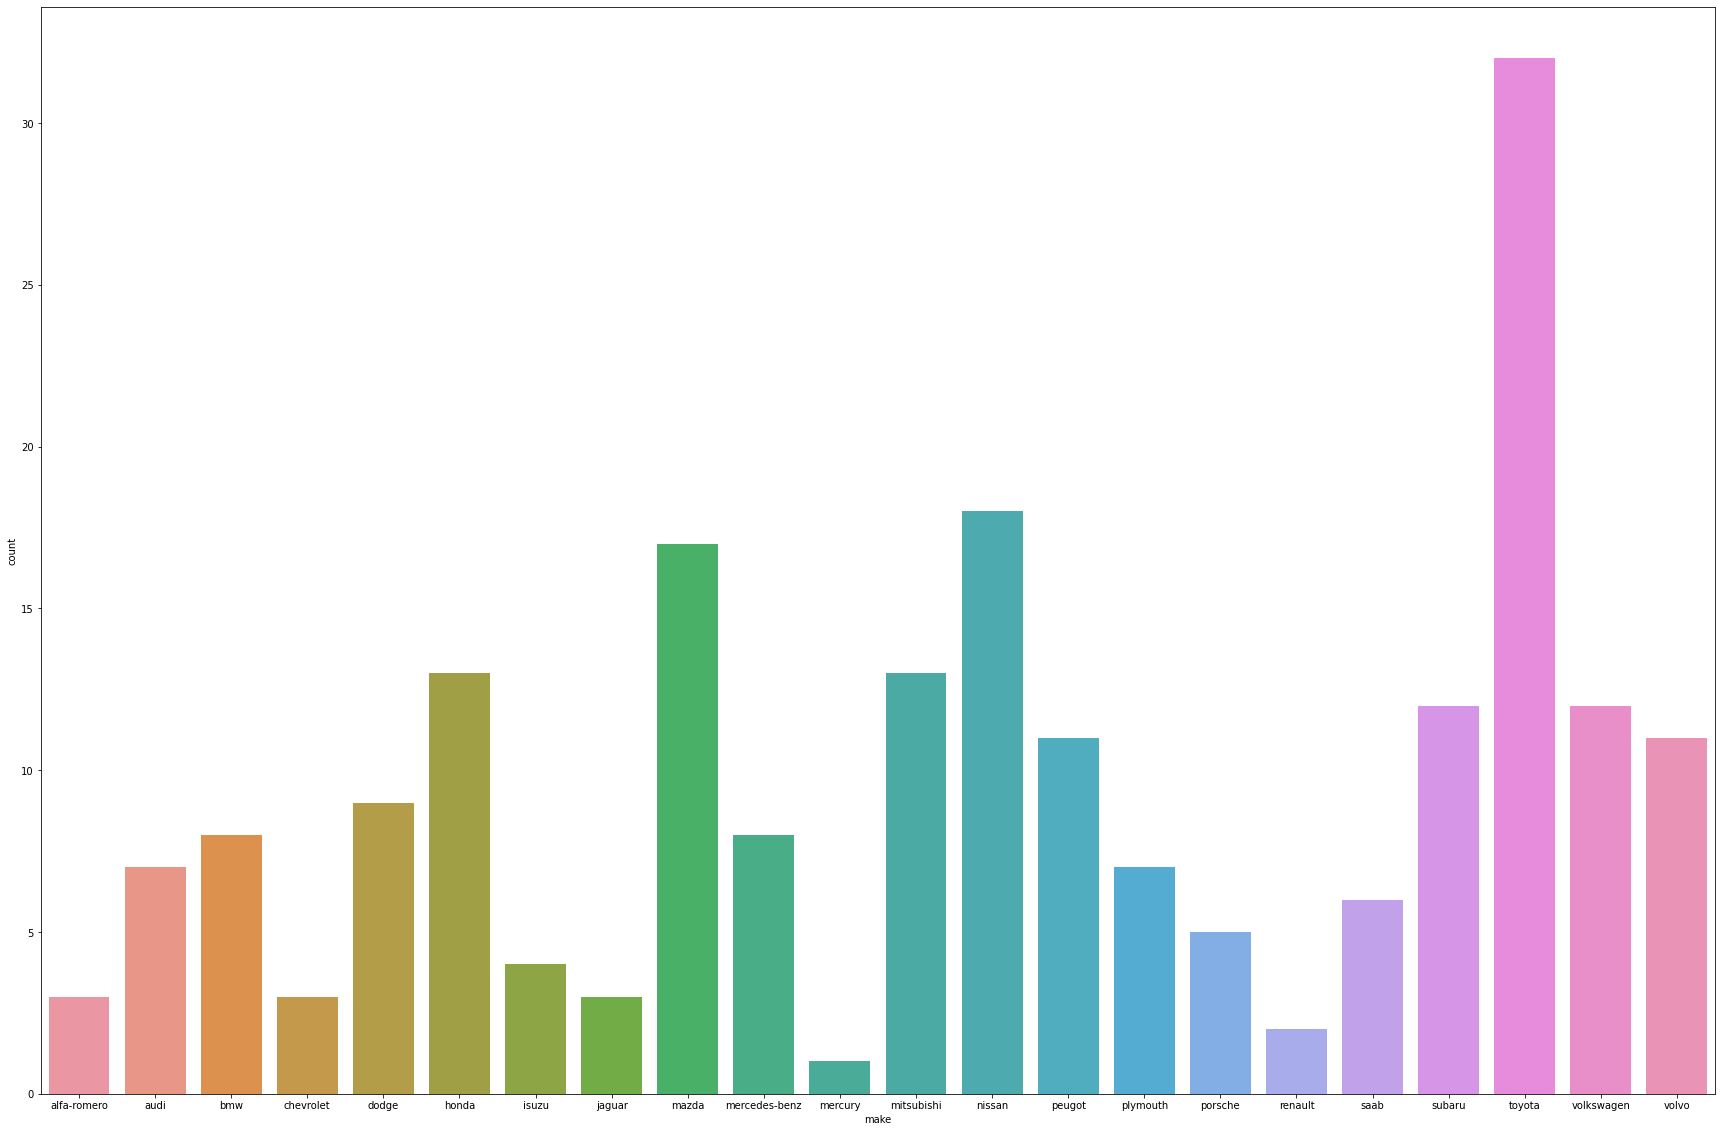

In [447]:
plt.figure(figsize=(30,20))
sns.countplot(data.make)

<H6>
Column4:Fuel types
<H6>    

In [448]:
data.fuel_type.describe()

count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

In [449]:
data.fuel_type.value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

In [450]:
data.fuel_type.isnull().sum()

0

In [451]:
data.fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

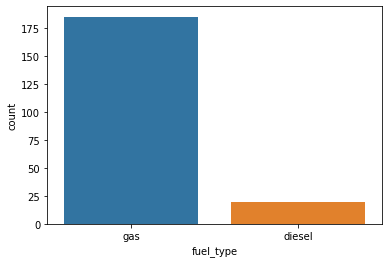

In [452]:
sns.countplot(data.fuel_type)

<H6>
Column5:Aspiration
<H6>

In [453]:
data.asp.describe()

count     205
unique      2
top       std
freq      168
Name: asp, dtype: object

In [454]:
data.asp.value_counts()

std      168
turbo     37
Name: asp, dtype: int64

In [455]:
data.asp.isnull().sum()

0

In [456]:
data.asp.unique()

array(['std', 'turbo'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='asp', ylabel='count'>

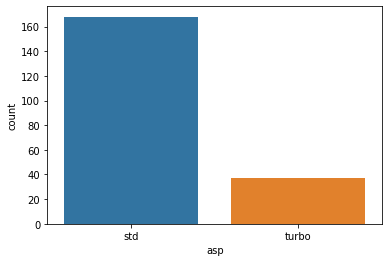

In [457]:
sns.countplot(data.asp)

<H6>
Column6:No Of Doors
<H6>    

In [458]:
data.no_door.describe()

count      203
unique       2
top       four
freq       114
Name: no_door, dtype: object

In [459]:
data.no_door.value_counts()

four    114
two      89
Name: no_door, dtype: int64

In [460]:
data.no_door.isnull().sum()

2

In [461]:
data.no_door.fillna('four',inplace=True)

In [462]:
data.no_door.isnull().sum()

0

In [463]:
data.no_door.unique()

array(['two', 'four'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_door', ylabel='count'>

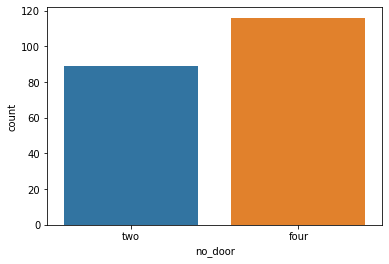

In [464]:
sns.countplot(data.no_door)

<H6>
Column7:Body Style
<H6>    

In [465]:
data.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [466]:
data.body_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [467]:
data.body_style.isnull().sum()

0

In [468]:
data.body_style.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='count'>

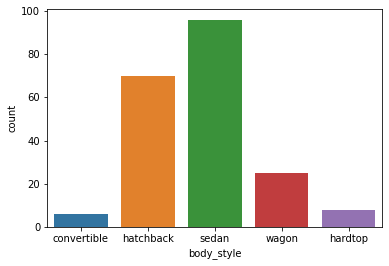

In [469]:
sns.countplot(data.body_style)

<H6>
Column8:Drive Wheels
<H6>

In [470]:
data.d_wheels.describe()

count     205
unique      3
top       fwd
freq      120
Name: d_wheels, dtype: object

In [471]:
data.d_wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: d_wheels, dtype: int64

In [472]:
data.d_wheels.isnull().sum()

0

In [473]:
data.d_wheels.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_wheels', ylabel='count'>

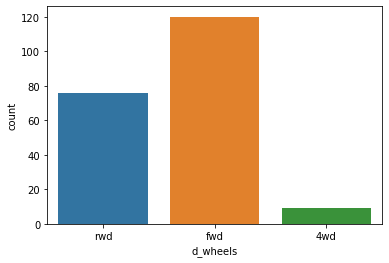

In [474]:
sns.countplot(data.d_wheels)

In [475]:
data.d_wheels.replace(['4wd','rwd'],['not fwd','not fwd'],inplace=True)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_wheels', ylabel='count'>

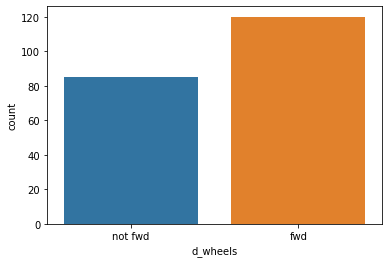

In [476]:
sns.countplot(data.d_wheels)

<H6>
Column9:Engine Location
<H6>

In [477]:
data.engine_loc.describe()

count       205
unique        2
top       front
freq        202
Name: engine_loc, dtype: object

In [478]:
data.engine_loc.value_counts()

front    202
rear       3
Name: engine_loc, dtype: int64

In [479]:
data.engine_loc.isnull().sum()

0

In [480]:
data.engine_loc.unique()

array(['front', 'rear'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_loc', ylabel='count'>

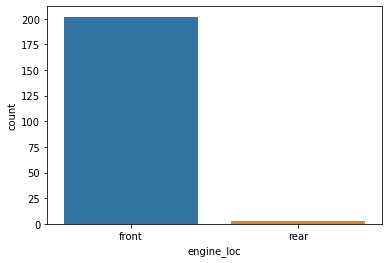

In [481]:
sns.countplot(data.engine_loc)

<H6>
Column10:Wheel Base
<H6>    

In [482]:
data.wheel_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel_base, dtype: float64

In [488]:
data.wheel_base.isnull().sum()

0

In [489]:
data.wheel_base.unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

{'whiskers': [<matplotlib.lines.Line2D at 0x11af383d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11af38af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11af38040>],
 'medians': [<matplotlib.lines.Line2D at 0x11af42250>],
 'fliers': [<matplotlib.lines.Line2D at 0x11af425e0>],
 'means': []}

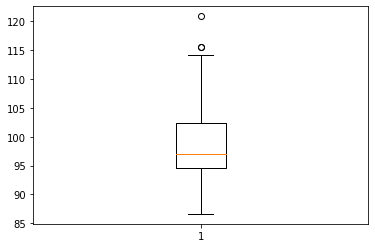

In [490]:
plt.boxplot(data.wheel_base)

In [491]:
stats.shapiro(data.wheel_base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

<H6>
The data is not normally distributed since the p value is less than alpha value
<H6>

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

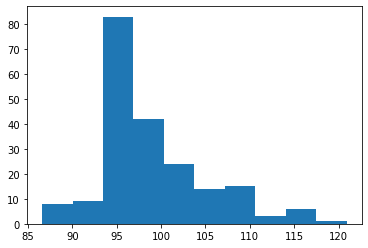

In [492]:
plt.hist(data.wheel_base)

<H6>
Column11:Length
<H6>

In [493]:
data.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [494]:
data.length.isnull().sum()

0

In [495]:
data.length.unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

{'whiskers': [<matplotlib.lines.Line2D at 0x11b0257c0>,
 'caps': [<matplotlib.lines.Line2D at 0x11b025ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b025430>],
 'medians': [<matplotlib.lines.Line2D at 0x11b031640>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b0319d0>],
 'means': []}

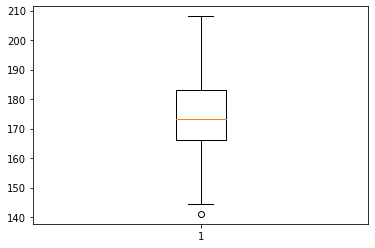

In [496]:
plt.boxplot(data.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

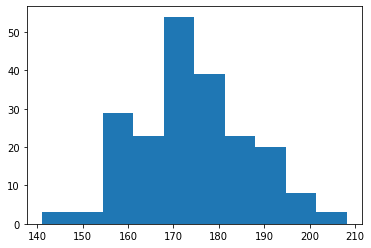

In [497]:
plt.hist(data.length)

In [498]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

<H6>
The data is not normally distributed since the p value is less than alpha value
<H6>

<H6>
Column12:Width
<H6>

In [505]:
data.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

In [506]:
data.width.isnull().sum()

0

In [507]:
data.width.unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

{'whiskers': [<matplotlib.lines.Line2D at 0x11b1e1ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x11b1f0400>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b1e1910>],
 'medians': [<matplotlib.lines.Line2D at 0x11b1f0b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b1f0eb0>],
 'means': []}

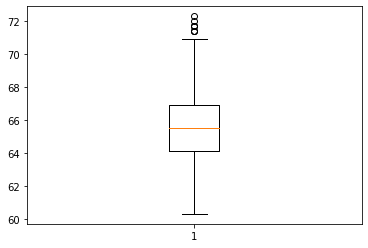

In [508]:
plt.boxplot(data.width)


(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

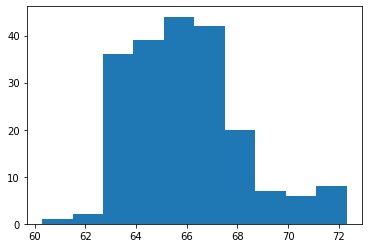

In [509]:
plt.hist(data.width)

In [510]:
stats.shapiro(data.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

<H6>
The data is not normally distributed since the p value is less than the aplha value.
<H6>

<H6>
Column13:Height
<H6>

In [511]:
data.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

In [512]:
data.height.isnull().sum()

0

In [513]:
data.height.unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

{'whiskers': [<matplotlib.lines.Line2D at 0x11b2bdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x11b2cf4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b2bda00>],
 'medians': [<matplotlib.lines.Line2D at 0x11b2cfc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b2cffa0>],
 'means': []}

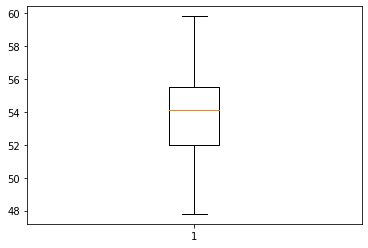

In [514]:
plt.boxplot(data.height)

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

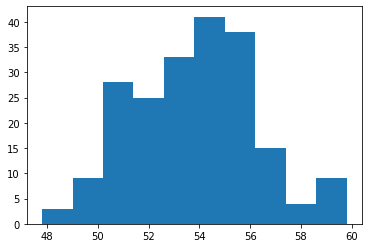

In [515]:
plt.hist(data.height)

In [516]:
stats.shapiro(data.height)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

<H6>
The data is not normally distributed since the p value is less than the alpha level.
<H6>

<H6>
Column14:Curb Weight
<H6>

In [517]:
data.curb_weight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

In [518]:
data.curb_weight.isnull().sum()

0

In [519]:
data.curb_weight.unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

{'whiskers': [<matplotlib.lines.Line2D at 0x11b393220>,
 'caps': [<matplotlib.lines.Line2D at 0x11b393940>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b388e50>],
 'medians': [<matplotlib.lines.Line2D at 0x11b39d0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b39d430>],
 'means': []}

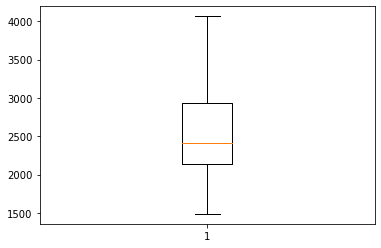

In [520]:
plt.boxplot(data.curb_weight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

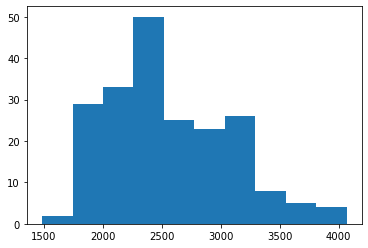

In [521]:
plt.hist(data.curb_weight)


In [522]:
stats.shapiro(data.curb_weight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

<H6>
The data is not normally distributed since the p value is less than the alpha value.
<H6>

<H6>
Column15:Engine Type
<H6>

In [523]:
data.engine_type.describe()

count     205
unique      7
top       ohc
freq      148
Name: engine_type, dtype: object

In [524]:
data.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [525]:
data.engine_type.isnull().sum()

0

In [526]:
data.engine_type.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

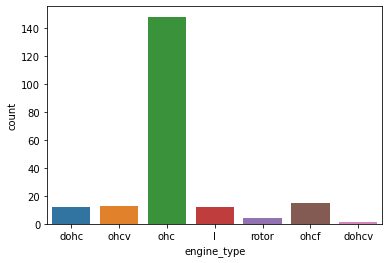

In [527]:
sns.countplot(data.engine_type)

<H6>
Column16:Number Of Cylinders
<H6>

In [528]:
data.no_cyl.describe()

count      205
unique       7
top       four
freq       159
Name: no_cyl, dtype: object

In [529]:
data.no_cyl.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: no_cyl, dtype: int64

In [530]:
data.no_cyl.isnull().sum()

0

In [531]:
data.no_cyl.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_cyl', ylabel='count'>

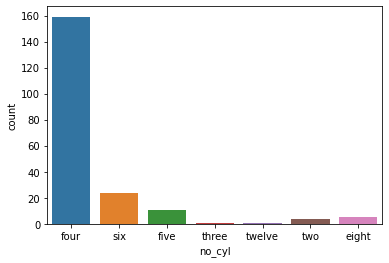

In [532]:
sns.countplot(data.no_cyl)

In [533]:
data.no_cyl.replace(['three','two','five','four','six','eight','twelve'],['less than five','less than five','five','four','six','>=eight','>=eight'],inplace=True)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_cyl', ylabel='count'>

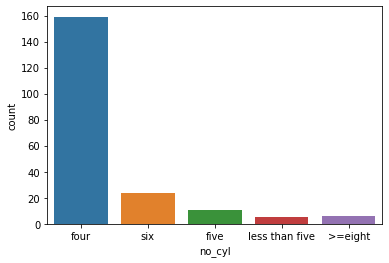

In [534]:
sns.countplot(data.no_cyl)

<H6>
Column17:Engine Size
<H6>


In [535]:
data.engine_size.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [536]:
data.engine_size.value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: engine_size, dtype: int64

In [537]:
data.engine_size.isnull().sum()

0

In [538]:
data.engine_size.unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x11b5af940>,
 'caps': [<matplotlib.lines.Line2D at 0x11b5bb0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b5af5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x11b5bb7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b5bbb50>],
 'means': []}

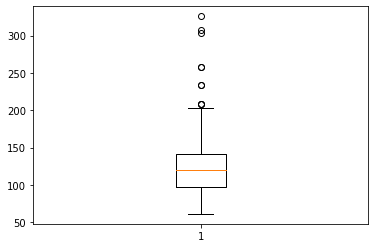

In [539]:
plt.boxplot(data.engine_size)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

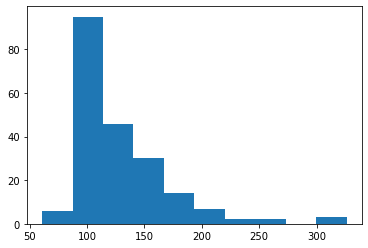

In [540]:
plt.hist(data.engine_size)

In [541]:
stats.shapiro(data.engine_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

<H6>
The data is not distributed normally since the p value is less than the aplha value.
<h6>

<H6>
Column18:Fuel System
<H6>

In [542]:
data.fuel_system.describe()

count      205
unique       8
top       mpfi
freq        94
Name: fuel_system, dtype: object

In [543]:
data.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [544]:
data.fuel_system.isnull().sum()

0

In [545]:
data.fuel_system.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='count'>

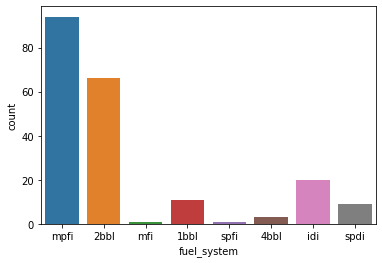

In [546]:
sns.countplot(data.fuel_system)

<H6>
Column19:Bore
<H6>

In [547]:
data.bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [548]:
data.bore.isnull().sum()

4

In [549]:
data.bore.fillna(3.329751,inplace=True)

In [550]:
data.bore.isnull().sum()

0

In [551]:
data.bore.unique()

array([3.47    , 2.68    , 3.19    , 3.13    , 3.5     , 3.31    ,
       3.62    , 2.91    , 3.03    , 2.97    , 3.34    , 3.6     ,
       2.92    , 3.15    , 3.43    , 3.63    , 3.54    , 3.08    ,
       3.329751, 3.39    , 3.76    , 3.58    , 3.46    , 3.8     ,
       3.78    , 3.17    , 3.35    , 3.59    , 2.99    , 3.33    ,
       3.7     , 3.61    , 3.94    , 3.74    , 2.54    , 3.05    ,
       3.27    , 3.24    , 3.01    ])

{'whiskers': [<matplotlib.lines.Line2D at 0x11b6f8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x11b708220>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b6f8730>],
 'medians': [<matplotlib.lines.Line2D at 0x11b708940>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b708cd0>],
 'means': []}

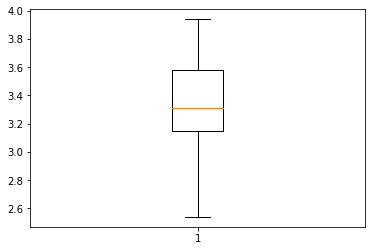

In [552]:
plt.boxplot(data.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

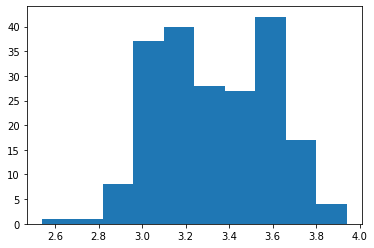

In [553]:
plt.hist(data.bore)

In [554]:
stats.shapiro(data.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

<H6>
The data is not normally distributed since the pvalue is less than aplha value.
<H6>

<H6>
Column20:Stroke
<H6>

In [555]:
data.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [556]:
data.stroke.isnull().sum()

4

In [557]:
data.stroke.fillna(3.255423,inplace=True)

In [558]:
data.stroke.isnull().sum()

0

In [559]:
data.stroke.unique()

array([2.68    , 3.47    , 3.4     , 2.8     , 3.19    , 3.39    ,
       3.03    , 3.11    , 3.23    , 3.46    , 3.9     , 3.41    ,
       3.07    , 3.58    , 4.17    , 2.76    , 3.15    , 3.255423,
       3.16    , 3.64    , 3.1     , 3.35    , 3.12    , 3.86    ,
       3.29    , 3.27    , 3.52    , 2.19    , 3.21    , 2.9     ,
       2.07    , 2.36    , 2.64    , 3.08    , 3.5     , 3.54    ,
       2.87    ])

{'whiskers': [<matplotlib.lines.Line2D at 0x1192f6ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x119303640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1192f6b50>],
 'medians': [<matplotlib.lines.Line2D at 0x119303d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x119310130>],
 'means': []}

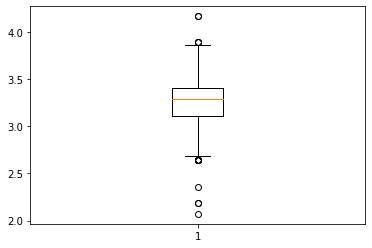

In [560]:
plt.boxplot(data.stroke)

(array([ 3.,  1., 13.,  7., 30., 56., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

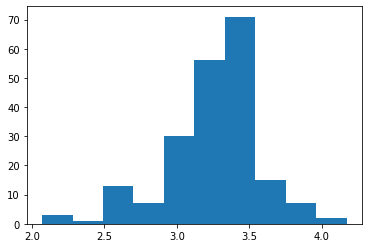

In [561]:
plt.hist(data.stroke)

In [562]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9377973675727844, pvalue=1.0984009435333064e-07)

<H6>
The data is not normally distributed since the pvalue is less than alpha value.
<H6>

<H6>
Column21:Compression Ratio
<H6>

In [563]:
data.com_ratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: com_ratio, dtype: float64

In [564]:
data.com_ratio.isnull().sum()

0

In [565]:
data.com_ratio.unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [566]:
data.com_ratio.fillna(10.142537,inplace=True)

In [567]:
data.com_ratio.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1193d6a60>,
 'caps': [<matplotlib.lines.Line2D at 0x119bd41c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1193d66d0>],
 'medians': [<matplotlib.lines.Line2D at 0x119bd48e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x119bd4c70>],
 'means': []}

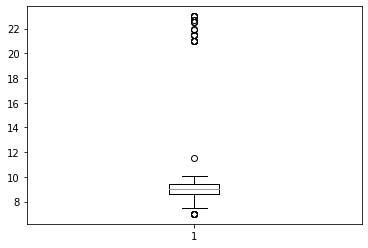

In [568]:
plt.boxplot(data.com_ratio)

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

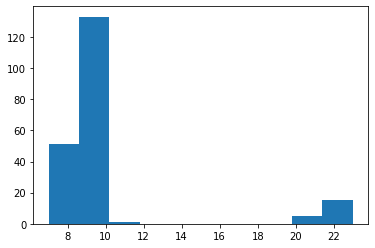

In [569]:
plt.hist(data.com_ratio)

In [570]:
stats.shapiro(data.com_ratio)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

<H6>
The data is not normally distributed since the pvalue is less than alpha value.
<H6>

<H6>
Column22:Horse Power
<H6>

In [571]:
data.hpower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: hpower, dtype: float64

In [572]:
data.hpower.isnull().sum()

2

In [573]:
data.hpower.fillna(104.256158,inplace=True)

In [574]:
data.hpower.isnull().sum()

0

In [575]:
data.hpower.unique()

array([111.      , 154.      , 102.      , 115.      , 110.      ,
       140.      , 160.      , 101.      , 121.      , 182.      ,
        48.      ,  70.      ,  68.      ,  88.      , 145.      ,
        58.      ,  76.      ,  60.      ,  86.      , 100.      ,
        78.      ,  90.      , 176.      , 262.      , 135.      ,
        84.      ,  64.      , 120.      ,  72.      , 123.      ,
       155.      , 184.      , 175.      , 116.      ,  69.      ,
        55.      ,  97.      , 152.      , 200.      ,  95.      ,
       142.      , 143.      , 207.      , 288.      , 104.256158,
        73.      ,  82.      ,  94.      ,  62.      ,  56.      ,
       112.      ,  92.      , 161.      , 156.      ,  52.      ,
        85.      , 114.      , 162.      , 134.      , 106.      ])

{'whiskers': [<matplotlib.lines.Line2D at 0x119cb8490>,
 'caps': [<matplotlib.lines.Line2D at 0x119cb8bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x119cb8100>],
 'medians': [<matplotlib.lines.Line2D at 0x119cc3310>],
 'fliers': [<matplotlib.lines.Line2D at 0x119cc36a0>],
 'means': []}

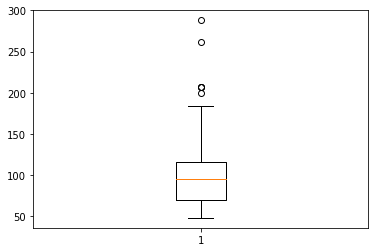

In [576]:
plt.boxplot(data.hpower)

(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

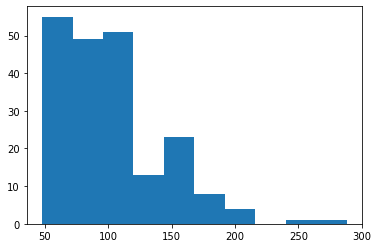

In [577]:
plt.hist(data.hpower)

In [578]:
stats.shapiro(data.hpower)

ShapiroResult(statistic=0.8850876688957214, pvalue=2.11449850684442e-11)

<H6>
The data is not normally distributed since the pvalue is less than alpha value.
<H6>

<H6>
Column23:Peak RPM
<H6>

In [579]:
data.peak_rpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [580]:
data.peak_rpm.isnull().sum()

2

In [581]:
data.peak_rpm.fillna(5125.369458,inplace=True)

In [582]:
data.peak_rpm.isnull().sum()

0

In [583]:
data.peak_rpm.unique()

array([5000.      , 5500.      , 5800.      , 4250.      , 5400.      ,
       5100.      , 4800.      , 6000.      , 4750.      , 4650.      ,
       4200.      , 4350.      , 4500.      , 5200.      , 4150.      ,
       5600.      , 5900.      , 5750.      , 5125.369458, 5250.      ,
       4900.      , 4400.      , 6600.      , 5300.      ])

{'whiskers': [<matplotlib.lines.Line2D at 0x11c6e2610>,
 'caps': [<matplotlib.lines.Line2D at 0x11c6e2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c6e2280>],
 'medians': [<matplotlib.lines.Line2D at 0x11c6ed490>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c6ed820>],
 'means': []}

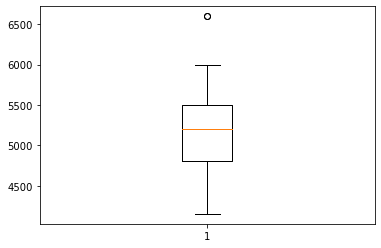

In [584]:
plt.boxplot(data.peak_rpm)

(array([17., 10., 41., 33., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

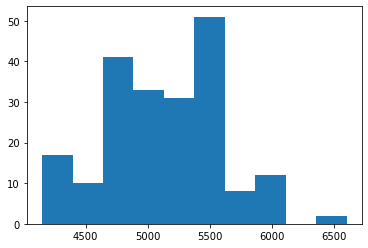

In [585]:
plt.hist(data.peak_rpm)

In [586]:
stats.shapiro(data.peak_rpm)

ShapiroResult(statistic=0.9705138802528381, pvalue=0.000267903262283653)

<H6>
The data is not normally distributed since the pvalue is less than aplha value.
<H6><H6>


<H6>
Column24:City MPG
<H6>

In [587]:
data.city_mpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city_mpg, dtype: float64

In [588]:
data.city_mpg.isnull().sum()

0

In [589]:
data.city_mpg.unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x11c7ba490>,
 'caps': [<matplotlib.lines.Line2D at 0x11c7babb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c7ba100>],
 'medians': [<matplotlib.lines.Line2D at 0x11c7c5310>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c7c56a0>],
 'means': []}

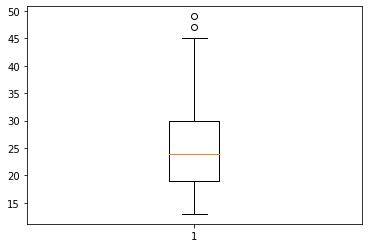

In [590]:
plt.boxplot(data.city_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

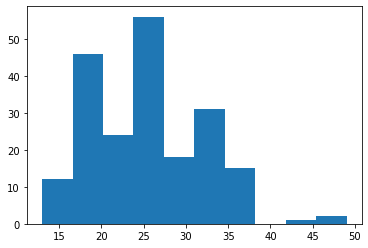

In [591]:
plt.hist(data.city_mpg)

In [592]:
stats.shapiro(data.city_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

<H6>
The data is not normally distributed since the pvalue is less than alpha value.
<H6>

<H6>
Column25:Highway MPG
<H6>

In [593]:
data.hw_mpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: hw_mpg, dtype: float64

In [594]:
data.hw_mpg.isnull().sum()

0

In [595]:
data.hw_mpg.unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x11c8a0790>,
 'caps': [<matplotlib.lines.Line2D at 0x11c8a0eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c8a0400>],
 'medians': [<matplotlib.lines.Line2D at 0x11c8ae610>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c8ae9a0>],
 'means': []}

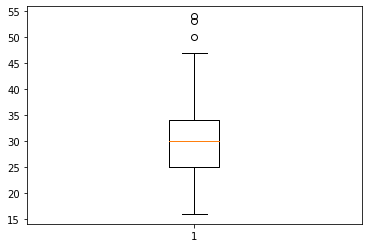

In [596]:
plt.boxplot(data.hw_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

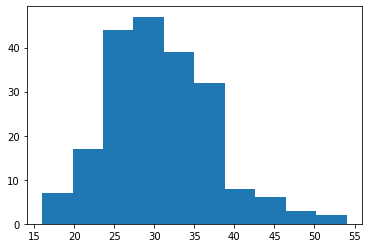

In [597]:
plt.hist(data.hw_mpg)

In [598]:
stats.shapiro(data.hw_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

<H6>
The data is not normally distributed since the pvalue is less than alpha value.
<H6>

<H6>
Column26:Price
<H6>

In [599]:
data.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [600]:
data.price.isnull().sum()

4

In [601]:
data.price.fillna(13207.129353,inplace=True)

In [602]:
data.price.isnull().sum()

0

In [603]:
data.price.unique()

array([13495.      , 16500.      , 13950.      , 17450.      ,
       15250.      , 17710.      , 18920.      , 23875.      ,
       13207.129353, 16430.      , 16925.      , 20970.      ,
       21105.      , 24565.      , 30760.      , 41315.      ,
       36880.      ,  5151.      ,  6295.      ,  6575.      ,
        5572.      ,  6377.      ,  7957.      ,  6229.      ,
        6692.      ,  7609.      ,  8558.      ,  8921.      ,
       12964.      ,  6479.      ,  6855.      ,  5399.      ,
        6529.      ,  7129.      ,  7295.      ,  7895.      ,
        9095.      ,  8845.      , 10295.      , 12945.      ,
       10345.      ,  6785.      , 11048.      , 32250.      ,
       35550.      , 36000.      ,  5195.      ,  6095.      ,
        6795.      ,  6695.      ,  7395.      , 10945.      ,
       11845.      , 13645.      , 15645.      ,  8495.      ,
       10595.      , 10245.      , 10795.      , 11245.      ,
       18280.      , 18344.      , 25552.      , 28248.

{'whiskers': [<matplotlib.lines.Line2D at 0x11c97fee0>,
 'caps': [<matplotlib.lines.Line2D at 0x11c98f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c97fb50>],
 'medians': [<matplotlib.lines.Line2D at 0x11c98fd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c99a130>],
 'means': []}

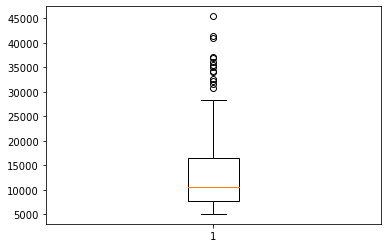

In [604]:
plt.boxplot(data.price)

(array([81., 45., 39., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

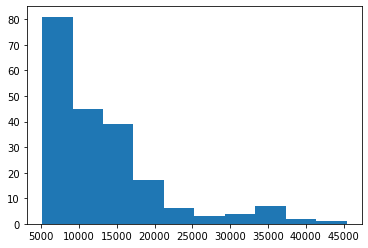

In [605]:
plt.hist(data.price)

In [606]:
stats.shapiro(data.price)

ShapiroResult(statistic=0.7997004985809326, pvalue=1.691838515494677e-15)

<H6>
The data is not normally distributed since the pvalue is less than alpha value.
<H6>

<H3>
MODEL CREATION
<H6>

In [607]:
Data=data.drop(['sym','make','fuel_type','asp','no_door','body_style','d_wheels','engine_loc','engine_type','no_cyl','fuel_system'],axis=1)

In [608]:
Data.columns

Index(['nor_los', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'com_ratio', 'hpower', 'peak_rpm',
       'city_mpg', 'hw_mpg', 'price'],
      dtype='object')

<H6>
Y=Price and X=Independent parameters
<H6>

<H6>
Pearsonr testin
<H6>

In [609]:
from scipy.stats import pearsonr
strength=pearsonr(Data.nor_los,Data.price)
print(strength)

(0.13399873429274337, 0.05543057826318259)


In [610]:
from scipy.stats import pearsonr
strength=pearsonr(Data.wheel_base,Data.price)
print(strength)

(0.5831681499791512, 4.5276255455256544e-20)


In [611]:
from scipy.stats import pearsonr
strength=pearsonr(Data.length,Data.price)
print(strength)

(0.6829862954389819, 1.649887328966592e-29)


In [612]:
from scipy.stats import pearsonr
strength=pearsonr(Data.width,Data.price)
print(strength)

(0.7286988175929279, 3.214520484065366e-35)


In [613]:
from scipy.stats import pearsonr
strength=pearsonr(Data.height,Data.price)
print(strength)

(0.13438751871101878, 0.05471982048333642)


In [614]:
from scipy.stats import pearsonr
strength=pearsonr(Data.curb_weight,Data.price)
print(strength)

(0.8208247333547347, 2.8663321070187436e-51)


In [615]:
from scipy.stats import pearsonr
strength=pearsonr(Data.engine_size,Data.price)
print(strength)

(0.8617522436859498, 9.669661923782083e-62)


In [616]:
strength=pearsonr(Data.bore,Data.price)
print(strength)

(0.5323000199585453, 2.1398305142063517e-16)


In [617]:
strength=pearsonr(Data.stroke,Data.price)
print(strength)

(0.08209529537133145, 0.24191456955577154)


In [618]:
strength=pearsonr(Data.com_ratio,Data.price)
print(strength)

(0.0709903627791758, 0.31178249194796)


In [619]:
strength=pearsonr(Data.hpower,Data.price)
print(strength)

(0.7579169537076744, 1.6076704223961165e-39)


In [620]:
strength=pearsonr(Data.peak_rpm,Data.price)
print(strength)

(-0.10085406591095528, 0.15019246954531384)


In [621]:
strength=pearsonr(Data.city_mpg,Data.price)
print(strength)

(-0.6674492651601812, 8.463700497351642e-28)


In [622]:
strength=pearsonr(Data.hw_mpg,Data.price)
print(strength)

(-0.6905257341186237, 2.2324674056721096e-30)


<H6>
Y=Price
X=Horsepower,Engine Size,Width,Curb Weight
<H6>

In [623]:
y=Data.price
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [624]:
x=Data.drop('price',axis=1)
print(x)

     nor_los  wheel_base  length  width  height  curb_weight  engine_size  \
0      122.0        88.6   168.8   64.1    48.8         2548          130   
1      122.0        88.6   168.8   64.1    48.8         2548          130   
2      122.0        94.5   171.2   65.5    52.4         2823          152   
3      164.0        99.8   176.6   66.2    54.3         2337          109   
4      164.0        99.4   176.6   66.4    54.3         2824          136   
..       ...         ...     ...    ...     ...          ...          ...   
200     95.0       109.1   188.8   68.9    55.5         2952          141   
201     95.0       109.1   188.8   68.8    55.5         3049          141   
202     95.0       109.1   188.8   68.9    55.5         3012          173   
203     95.0       109.1   188.8   68.9    55.5         3217          145   
204     95.0       109.1   188.8   68.9    55.5         3062          141   

     bore  stroke  com_ratio  hpower  peak_rpm  city_mpg  hw_mpg  
0    3.4

In [625]:
x.drop(['nor_los','wheel_base','length','height','bore','stroke','com_ratio','peak_rpm','city_mpg','hw_mpg'],axis=1,inplace=True)

In [626]:
print(x)

     width  curb_weight  engine_size  hpower
0     64.1         2548          130   111.0
1     64.1         2548          130   111.0
2     65.5         2823          152   154.0
3     66.2         2337          109   102.0
4     66.4         2824          136   115.0
..     ...          ...          ...     ...
200   68.9         2952          141   114.0
201   68.8         3049          141   160.0
202   68.9         3012          173   134.0
203   68.9         3217          145   106.0
204   68.9         3062          141   114.0

[205 rows x 4 columns]


In [627]:
y.shape

(205,)

In [628]:
x.shape

(205, 4)

In [629]:
train_y=y.iloc[0:164]
print(train_y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
159     7788.0
160     7738.0
161     8358.0
162     9258.0
163     8058.0
Name: price, Length: 164, dtype: float64


In [630]:
test_y=y.iloc[164:]
print(test_y)

164     8238.0
165     9298.0
166     9538.0
167     8449.0
168     9639.0
169     9989.0
170    11199.0
171    11549.0
172    17669.0
173     8948.0
174    10698.0
175     9988.0
176    10898.0
177    11248.0
178    16558.0
179    15998.0
180    15690.0
181    15750.0
182     7775.0
183     7975.0
184     7995.0
185     8195.0
186     8495.0
187     9495.0
188     9995.0
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
194    12940.0
195    13415.0
196    15985.0
197    16515.0
198    18420.0
199    18950.0
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, dtype: float64


In [631]:
train_x=x.iloc[0:164]
print(train_x)

     width  curb_weight  engine_size  hpower
0     64.1         2548          130   111.0
1     64.1         2548          130   111.0
2     65.5         2823          152   154.0
3     66.2         2337          109   102.0
4     66.4         2824          136   115.0
..     ...          ...          ...     ...
159   64.4         2275          110    56.0
160   64.4         2094           98    70.0
161   64.4         2122           98    70.0
162   64.4         2140           98    70.0
163   64.0         2169           98    70.0

[164 rows x 4 columns]


In [632]:
test_x=x.iloc[164:]
print(test_x)

     width  curb_weight  engine_size  hpower
164   64.0         2204           98    70.0
165   64.0         2265           98   112.0
166   64.0         2300           98   112.0
167   65.6         2540          146   116.0
168   65.6         2536          146   116.0
169   65.6         2551          146   116.0
170   65.6         2679          146   116.0
171   65.6         2714          146   116.0
172   65.6         2975          146   116.0
173   66.5         2326          122    92.0
174   66.5         2480          110    73.0
175   66.5         2414          122    92.0
176   66.5         2414          122    92.0
177   66.5         2458          122    92.0
178   67.7         2976          171   161.0
179   67.7         3016          171   161.0
180   66.5         3131          171   156.0
181   66.5         3151          161   156.0
182   65.5         2261           97    52.0
183   65.5         2209          109    85.0
184   65.5         2264           97    52.0
185   65.5

In [633]:
import statsmodels.api as sm
x=sm.add_constant(x)

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [634]:
x.shape

(205, 5)

In [635]:
model=sm.OLS(train_y,train_x).fit()

In [636]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              620.2
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                    2.97e-96
Time:                        10:50:52   Log-Likelihood:                         -1588.0
No. Observations:                 164   AIC:                                      3184.
Df Residuals:                     160   BIC:                                      3196.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
width        -213.8198     27.915     -7.660      0.000    -268.948    -158.691
curb_weight     4.3060      1.173      3.671      0.000       1.990       6.622
engine_size   106.6094     15.418      6.914      0.000      76.160     137.059
hpower         28.8189     13.003      2.216      0.028       3.139      54.499
==============================================================================
Omnibus:                       14.766   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               42.420
Skew:                           0.188   Prob(JB):                     6.15e-10
Kurtosis:                       5.463   Cond. No.                         242.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [637]:
predicted_y=model.predict(test_x)
print(predicted_y)

164     8271.011266
165     9744.070133
166     9894.780357
167    15818.637480
168    15801.413454
169    15866.003550
170    16417.172369
171    16567.882593
172    17691.750263
173    11454.435471
174    10290.688987
175    11833.364034
176    11833.364034
177    12022.828315
178    21209.119021
179    21381.359277
180    21989.039486
181    21009.065475
182     7570.374814
183     9576.798109
184     7583.292833
185     9589.716128
186     9860.994531
187     8281.225081
188    10400.927718
189    10192.628540
190    10093.294298
191    14822.691103
192     9101.438959
193    10888.233193
194    16487.675298
195    17013.008079
196    16586.713445
197    17047.456130
198    17270.976284
199    17753.249000
200    16296.421815
201    18061.154371
202    20542.660814
203    17633.400218
204    16770.082518
dtype: float64


<H6>
Hypothesis test for the Y=Price and X=Discrete data
<H6>

<H6>
Oneway anova test for price and symboling.
<H6>

In [641]:
d1=data.price[data.sym=="less than zero"]
d2=data.price[data.sym=="zero"]
d3=data.price[data.sym=="1"]
d4=data.price[data.sym=="2"]
d5=data.price[data.sym=="3"]
stats.f_oneway(d1,d2,d3,d4,d5)

F_onewayResult(statistic=8.596939059375929, pvalue=2.0165673442839212e-06)

<H6>
Oneway anova test for price and make.
<H6>

In [640]:
d1=data.price[data.make=="alfa-romero"]
d2=data.price[data.make=="audi"]
d3=data.price[data.make=="bmw"]
d4=data.price[data.make=="chevrolet"]
d5=data.price[data.make=="dodge"]
d6=data.price[data.make=="honda"]
stats.f_oneway(d1,d2,d3,d4,d5,d6)

F_onewayResult(statistic=20.971027732702417, pvalue=6.871818139008785e-10)

<H6>
Oneway anova test for price and fuel type.
<H6>


In [643]:
d1=data.price[data.fuel_type=="diesel"]
d2=data.price[data.fuel_type=="gas"]
stats.f_oneway(d1,d2)

F_onewayResult(statistic=2.4958589760769563, pvalue=0.11570297526298147)

<H6>
Oneway anova test for price and aspiration.
<H6>

In [646]:
d1=data.price[data.asp=="std"]
d2=data.price[data.asp=="turbo"]
stats.f_oneway(d1,d2)

F_onewayResult(statistic=6.587289855132936, pvalue=0.010991046478680874)

<H6>
Oneway anova test for price and number of doors.
<H6>

In [647]:
d1=data.price[data.no_door=="four"]
d2=data.price[data.no_door=="two"]
stats.f_oneway(d1,d2)

F_onewayResult(statistic=0.3577851657233343, pvalue=0.5504056367589552)

<H6>
Oneway anova test for price and body style.
<H6>

In [649]:
d1=data.price[data.body_style=="hardtop"]
d2=data.price[data.body_style=="wagon"]
d3=data.price[data.body_style=="sedan"]
d4=data.price[data.body_style=="hatchback"]
d5=data.price[data.body_style=="convertible"]
stats.f_oneway(d1,d2,d3,d4,d5)

              

F_onewayResult(statistic=9.183927252583397, pvalue=7.844575720804091e-07)

<H6>
Oneway anova test for price and drive wheels.
<H6>

In [650]:
d1=data.price[data.d_wheels=="4wd"]
d2=data.price[data.d_wheels=="fwd"]
d3=data.price[data.d_wheels=="rwd"]
stats.f_oneway(d1,d2,d3)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

<H6>
Oneway anova test for price and engine location.
<H6>

In [651]:
d1=data.price[data.engine_loc=="front"]
d2=data.price[data.engine_loc=="rear"]
stats.f_oneway(d1,d2)

F_onewayResult(statistic=24.979629190458926, pvalue=1.2486063656753427e-06)

<H6>
Oneway anova test for price and engine type.
<H6>

In [653]:
d1=data.price[data.engine_type=="dohc"]
d2=data.price[data.engine_type=="dohcv"]
d3=data.price[data.engine_type=="l"]
d4=data.price[data.engine_type=="ohc"]
d5=data.price[data.engine_type=="ohcf"]
d6=data.price[data.engine_type=="ohcv"]
d7=data.price[data.engine_type=="rotor"]
stats.f_oneway(d1,d2,d3,d4,d5,d6,d7)

F_onewayResult(statistic=8.298116388300434, pvalue=5.008077704793496e-08)

<H6>
Oneway anova test for price and number of cylinders.
<H6>

In [654]:
d1=data.price[data.no_cyl=="eight"]
d2=data.price[data.no_cyl=="five"]
d3=data.price[data.no_cyl=="four"]
d4=data.price[data.no_cyl=="six"]
d5=data.price[data.no_cyl=="three"]
d6=data.price[data.no_cyl=="twelve"]
d7=data.price[data.no_cyl=="two"]

stats.f_oneway(d1,d2,d3,d4,d5,d6,d7)

F_onewayResult(statistic=nan, pvalue=nan)

<H6>
Oneway anova test for price and fuel system.
<H6>

In [655]:
d1=data.price[data.fuel_system=="1bbl"]
d2=data.price[data.fuel_system=="2bbl"]
d3=data.price[data.fuel_system=="4bbl"]
d4=data.price[data.fuel_system=="idi"]
d5=data.price[data.fuel_system=="mfi"]
d6=data.price[data.fuel_system=="mpfi"]
d7=data.price[data.fuel_system=="spdi"]
d8=data.price[data.fuel_system=="spfi"]
stats.f_oneway(d1,d2,d3,d4,d5,d6,d7,d8)

F_onewayResult(statistic=14.797402090228692, pvalue=1.8657347748569357e-15)

In [656]:
model.params

width         -213.819847
curb_weight      4.306006
engine_size    106.609414
hpower          28.818868
dtype: float64

In [657]:
predicted_values=model.predict(test_x)

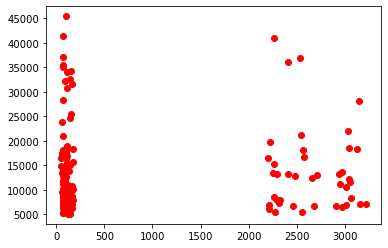

In [662]:
plt.scatter(x=test_x,y=train_y,color='red')

<AxesSubplot:xlabel='price'>

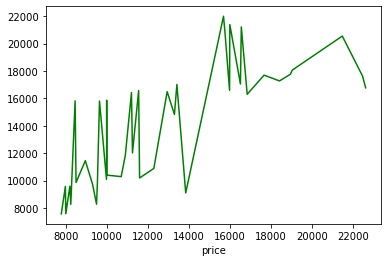

In [666]:
sns.lineplot(x=test_y,y=predicted_values,color='green')

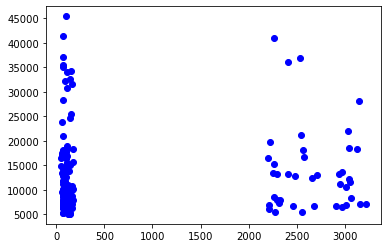

In [670]:
plt.scatter(x=test_x,y=train_y,color='blue')